In [10]:
import joblib
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt



In [11]:
#import training an stesting data
X_train = np.genfromtxt('X_train.csv', delimiter=',')
X_test = np.genfromtxt('X_test.csv', delimiter=',')
y_train = np.genfromtxt('y_train.csv', delimiter=',')
y_test = np.genfromtxt('y_test.csv', delimiter=',')
dates = pd.read_csv('dates.csv')
dates = dates.Date

dates.head()

0    2020-02-21 11:55:08
1    2020-07-16 17:06:05
2    2020-01-22 10:18:08
3    2020-05-14 12:24:11
4    2020-05-14 11:37:13
Name: Date, dtype: object

In [12]:
#import neural network
clf = joblib.load('mlp_reg_3.pkl')


In [13]:
#fit model
from sklearn.metrics import mean_squared_error, r2_score
y_pred = clf.predict(X_test)

y_test = (y_test/5)
y_pred = (y_pred/5)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

dates.dtypes

0.0007853665008824628
0.7816899765112242


dtype('O')

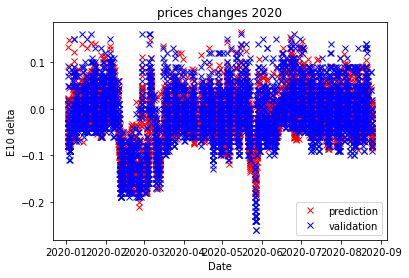

In [16]:
from matplotlib import dates as mdates
dates = pd.to_datetime(dates)

plt.plot_date(dates, y_pred, linestyle='None', marker='x', color='r', label='prediction')
plt.plot_date(dates, y_test, linestyle='None', marker='x', color='b', label='testing')
plt.title("prices changes 2020")
plt.xlabel("Date")
plt.ylabel("E10 delta")
plt.legend()
plt.show()

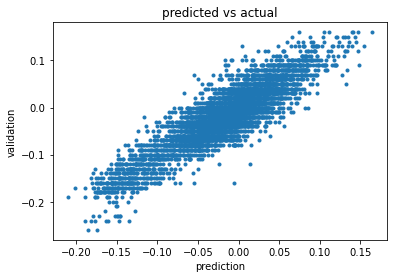

In [15]:
plt.plot(y_pred, y_test, linestyle='None', marker='.')
plt.title("predicted vs testing")
plt.xlabel("prediction")
plt.ylabel("testing")
plt.show()

In [26]:
y_test_grad = np.zeros(len(y_test))
y_pred_grad = np.zeros(len(y_test))
for i in range(len(y_test)):
    y_test_grad[i] = y_test[i] - y_test[i-1]
    y_pred_grad[i] = y_pred[i] - y_pred[i-1]

plt.plot(y_pred_grad, y_test_grad, linestyle='None', marker='x')
plt.title("gradient predicted vs testing")
plt.xlabel("prediction")
plt.ylabel("testing")
plt.show()